# Bar Chart

This section showcases the bar chart. It contains examples of how to create the bar chart using the [datachart.charts.BarChart](/references/charts#datachart.charts.BarChart) function.

The examples sequentially build on each other, going from simple to complex.

As mentioned above, the bar charts are created using the `BarChart` function found in the [datachart.charts](datachart.charts) module. Let's import it:

In [1]:
from datachart.charts import BarChart

<div class="admonition note">
    <p class="admonition-title">Double figure generation avoidence</p>
    <p style="margin-top: .6rem; margin-bottom: .6rem">
        To avoid double figure generation, the <code>BarChart</code> function is preceded by the <code>_ =</code> operator. The double figures are generated because <code>BarChart</code> returns the <code>plt.Figure</code> object, which is then used to save the figure locally.
    </p>
</div>

## Bar Chart Input Attributes

The `BarChart` function accepts the attributes of the [datachart.typings.BarChartAttrs](/references/typings/#datachart.typings.BarChartAttrs) type. In a nutshell, the input is a `dict` object containing the `charts` attribute, which is either a `dict` or a `List[dict]` where each dictionary contains some of the following attributes:

```python
{
  "data": [{                                            # A list of bar data points
    "label": str,                                       # The x-axis value
    "y":     Union[int, float],                         # The y-axis value
    "yerr":  Optional[Union[int, float]]                # The y-axis error value
  }],
  "style": {                                            # The style of the bar (optional)
    "plot_bar_color":       Union[str, None],           # The color of the bar
    "plot_bar_alpha":       Union[float, None],         # The alpha of the bar
    "plot_bar_width":       Union[int, float, None],    # The width of the bar
    "plot_bar_zorder":      Union[int, float, None],    # The z-order of the bar
    "plot_bar_hatch":       Union[HATCH_STYLE, None],   # The hatch style of the bar
    "plot_bar_edge_width":  Union[int, float, None],    # The edge line width of the edge
    "plot_bar_edge_color":  Union[str, None],           # The edge line color
    "plot_bar_error_color": Union[str, None],           # The error line color
  },
  "subtitle": Optional[str],                            # The title of the chart
  "xlabel":   Optional[str],                            # The x-axis label
  "ylabel":   Optional[str],                            # The y-axis label

  "xticks": Optional[List[Union[int, float]]],          # the x-axis ticks
  "xticklabels": Optional[List[Union[str, float, str]], # the x-axis tick labels (must be same length as xticks)
  "xtickrotate": Optional[int],                         # the x-axis tick labels rotation
  "yticks": Optional[List[Union[int, float]]],          # the y-axis ticks
  "yticklabels": Optional[List[Union[str, float, str]], # the y-axis tick labels (must be same length as yticks)
  "ytickrotate": Optional[int],                         # the y-axis tick labels rotation

  "vlines": Optional[Union[dict, None]],                # the vertical lines
  "hlines": Optional[Union[dict, None]],                # the horizontal lines
}
```

For more details, see the [datachart.typings.BarChartAttrs](/references/typings/#datachart.typings.BarChartAttrs) type.

## Single Bar Chart

In this part, we show how to create a single bar chart using the `BarChart` function. 

Let us first import the necessary libraries:

In [2]:
import random

**Basic example.** Let us first create a basic bar chart showing a random distribution. 

The following example shows how only the `charts["data"]` attribute is required to draw the bar chart.

In [3]:
NUM_OF_POINTS = 10

In [4]:
charts = {
    "data": [
        {"label": f"xx{id}", "y": 100 * (id + 1) * random.random()}
        for id in range(NUM_OF_POINTS)
    ],
}

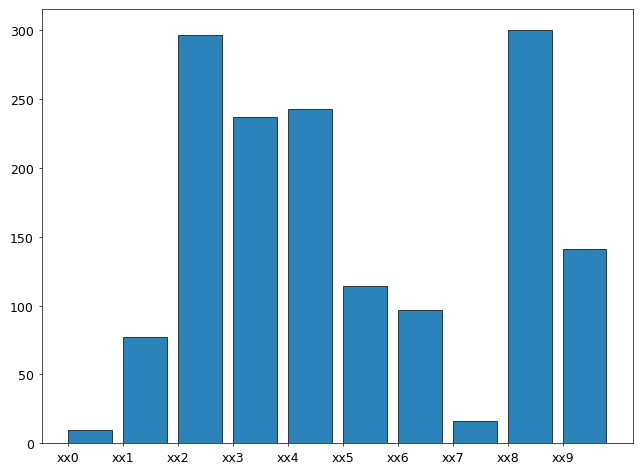

In [5]:
_ = BarChart(
    {
        # add the data to the chart
        "charts": charts,
    }
)

### Chart title and axis labels

To add the chart title and axis labels, simply add the `title`, `xlabel` and `ylabel` attributes.

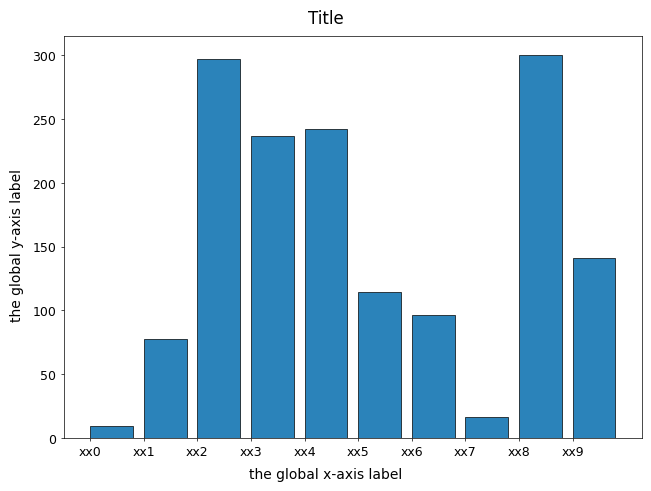

In [6]:
_ = BarChart(
    {
        "charts": charts,
        # add the title
        "title": "Title",
        # add the x and y axis labels
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
    }
)

### Figure size and grid

To change the figure size, simply add the `figsize` attribute. The `figsize` attribute can be a tuple (width, height), values are in inches. The `datachart` package provides a [datachart.constants.FIG_SIZE](/references/constants/#datachart.constants.FIG_SIZE) constant, which contains some of the predefined figure sizes.

To add the grid, simply add the `show_grid` attribute. The possible options are:

| Option | Description |
| --- | --- |
| `"both"` | shows both the x-axis and the y-axis gridlines. |
| `"x"` | shows only the x-axis grid lines. |
| `"y"` | shows only the y-axis grid lines. |

Again, `datachart` provides a [datachart.constants.SHOW_GRID](/references/constants/#datachart.constants.SHOW_GRID) constant, which contains the supported options.

In [7]:
from datachart.constants import FIG_SIZE, SHOW_GRID

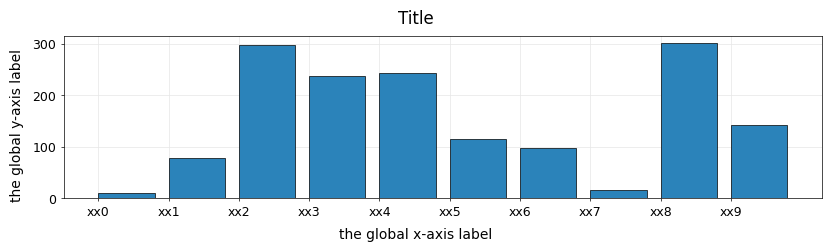

In [8]:
_ = BarChart(
    {
        "charts": charts,
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        # add to determine the figure size
        "figsize": FIG_SIZE.A4_NARROW,
        # add to show the grid lines
        "show_grid": SHOW_GRID.BOTH,
    }
)

### Bar style

To change a single bar style simply add the `style` attribute with the corresponding attributes. The supported attributes are shown in the [datachart.typings.BarStyleAttrs](/references/typings/#datachart.typings.BarStyleAttrs) type, which contains the following attributes:

| Attribute | Description |
| :-------- | :---------- |
| `"plot_bar_color"`       | The color of the bar (hex color code). |
| `"plot_bar_alpha"`       | The alpha of the bar (how visible the bar is). |
| `"plot_bar_width"`       | The width of the bar. |
| `"plot_bar_zorder"`      | The zorder of the bar. |
| `"plot_bar_hatch"`       | The hatch style of the bar. |
| `"plot_bar_edge_width"`  | The edge line width of the edge. |
| `"plot_bar_edge_color"`  | The edge line color (hex color code). |
| `"plot_bar_error_color"` | The error line color (hex color code). |

Again, to help with the style settings, the [datachart.constants](/references/constants/) module contains the following constants:

| Constant | Description |
| :------- | :---------- |
| [datachart.constants.HATCH_STYLE](/references/constants/#datachart.constants.HATCH_STYLE) | The hatch style of the bar. |


In [9]:
from datachart.constants import HATCH_STYLE

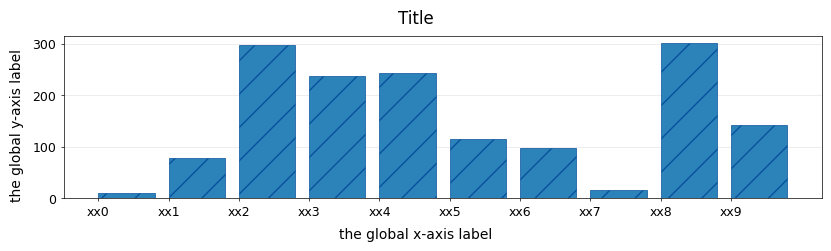

In [10]:
_ = BarChart(
    {
        "charts": {
            "data": charts["data"],
            # define the style of the bars
            "style": {
                "plot_bar_hatch": HATCH_STYLE.DIAGONAL,
                "plot_bar_edge_width": 0.5,
                "plot_bar_edge_color": "#08519c",
            },
        },
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": FIG_SIZE.A4_NARROW,
        "show_grid": SHOW_GRID.Y,
    }
)

### Bar orientation

To change the orientation of the bars, simply add the `orientation` attribute, which supports the following values:

| Value | Description |
| :---- | :---------- |
| `"horizontal"` | The bars are horizontal. |
| `"vertical"` | The bars are vertical. |

Again, to help with the style settings, the [datachart.constants](/references/constants/) module contains the following constants:

| Constant | Description |
| :------- | :---------- |
| [datachart.constants.ORIENTATION](/references/constants/#datachart.constants.ORIENTATION) | The orientation of the bars. |

In [11]:
from datachart.constants import ORIENTATION

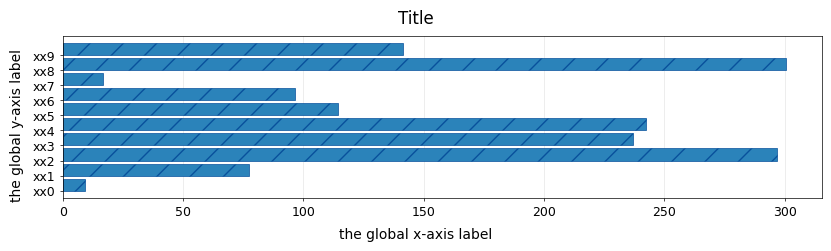

In [12]:
_ = BarChart(
    {
        "charts": {
            "data": charts["data"],
            "style": {
                "plot_bar_hatch": HATCH_STYLE.DIAGONAL,
                "plot_bar_edge_width": 0.5,
                "plot_bar_edge_color": "#08519c",
            },
        },
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": FIG_SIZE.A4_NARROW,
        # change the grid to match the change in orientation
        "show_grid": SHOW_GRID.X,
        # change the orientation of the bars
        "orientation": ORIENTATION.HORIZONTAL,
    }
)

### Adding vertical and horizontal lines

**Adding vertical lines.** Within the `charts` attribute, define the attribute `vlines` with the [datachart.typings.VLinePlotAttrs](/references/typings/#datachart.typings.VLinePlotAttrs) typing, which is either a `dict` or a `List[dict]` where each dictionary contains some of the following attributes:

```python
{
  "x":    Union[int, float],                 # The x-axis value (values are bar indices, e.g. 0, 1, 2, etc.)
  "ymin": Optional[Union[int, float]],       # The minimum y-axis value
  "ymax": Optional[Union[int, float]],       # The maximum y-axis value
  "style": {                                 # The style of the line (optional)
    "plot_vline_color": Optional[str],       # The color of the line (hex color code)
    "plot_vline_style": Optional[LineStyle], # The line style (solid, dashed, etc.)
    "plot_vline_width": Optional[float],     # The width of the line
    "plot_vline_alpha": Optional[float],     # The alpha of the line (how visible the line is)
  },
  "label": Optional[str],                    # The label of the line
}
```

**Adding horizontal lines.** Within the `charts` attribute, define the attribute `hlines`, with the [datachart.typings.HLinePlotAttrs](/references/typings/#datachart.typings.HLinePlotAttrs) typing, which is either a `dict` or a `List[dict]` where each dictionary contains some of the following attributes:

```python
{
  "y":    Union[int, float],                 # The y-axis value
  "xmin": Optional[Union[int, float]],       # The minimum x-axis value  (values are bar indices, e.g. 0, 1, 2, etc.)
  "xmax": Optional[Union[int, float]],       # The maximum x-axis value  (values are bar indices, e.g. 0, 1, 2, etc.)
  "style": {                                 # The style of the line (optional)
    "plot_hline_color": Optional[str],       # The color of the line (hex color code)
    "plot_hline_style": Optional[LineStyle], # The line style (solid, dashed, etc.)
    "plot_hline_width": Optional[float],     # The width of the line
    "plot_hline_alpha": Optional[float],     # The alpha of the line (how visible the line is)
  },
  "label": Optional[str],                    # The label of the line
}
```


To add vertical and horizontal lines, simply add the `vlines` and `hlines` attributes into the input dictionary.

In [13]:
from datachart.constants import LINE_STYLE

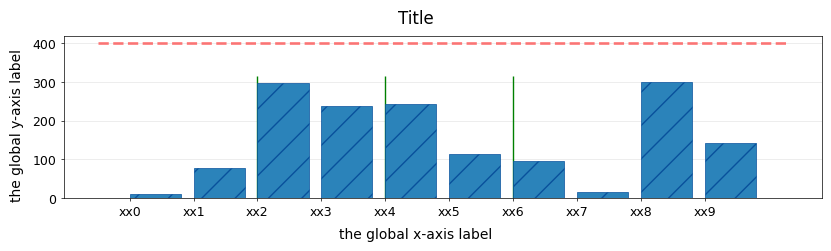

In [14]:
_ = BarChart(
    {
        "charts": {
            "data": charts["data"],
            "style": {
                "plot_bar_hatch": HATCH_STYLE.DIAGONAL,
                "plot_bar_edge_width": 0.5,
                "plot_bar_edge_color": "#08519c",
            },
            # add a list of vertical lines
            "vlines": [
                {
                    "x": 2 * i,
                    "style": {
                        "plot_vline_color": "green",
                        "plot_vline_style": LINE_STYLE.SOLID,
                        "plot_vline_width": 1,
                    },
                }
                for i in range(1, 4)
            ],
            # add a list of horizontal lines
            "hlines": {
                "y": 400,
                "style": {
                    "plot_hline_color": "red",
                    "plot_hline_style": LINE_STYLE.DASHED,
                    "plot_hline_width": 2,
                    "plot_hline_alpha": 0.5,
                },
            },
        },
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": FIG_SIZE.A4_NARROW,
        "show_grid": SHOW_GRID.Y,
    }
)

## Multiple Bar Charts

To add multiple bar charts, simply add the `charts` attribute with a list of charts, as shown below.

<div class="admonition note">
    <p class="admonition-title">Attributes same as creating a single chart</p>
    <p style="margin-top: .6rem; margin-bottom: .6rem">
        We designed the <code>datachart.charts.*</code> functions to use the same attribute naming when possible. To create multiple charts, the <code>charts</code> attribute becomes a list of dictionaries with the same attributes as when creating a single chart.
    </p>
</div>

In [15]:
# the charts data is now a list of charts
charts = [
    {
        "data": [
            {"label": f"xx{id}", "y": 100 * (id + 1) * random.random()}
            for id in range(NUM_OF_POINTS)
        ],
    }
    for _ in range(2)
]

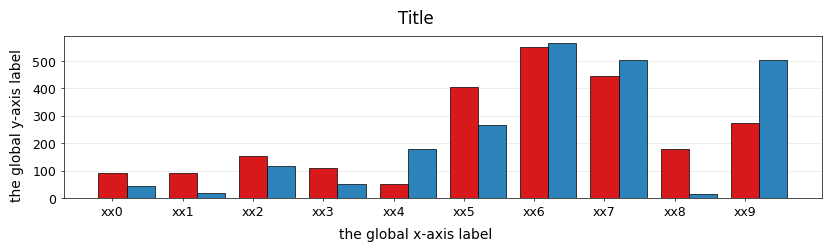

In [16]:
_ = BarChart(
    {
        # use a list of charts to define multiple bar charts
        "charts": charts,
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": FIG_SIZE.A4_NARROW,
        "show_grid": SHOW_GRID.Y,
    }
)

### Sub-chart subtitles

We can name each chart by adding the `subtitle` attribute to each chart. In addition, to help with discerning which chart is which, use the `show_legend` attribute to show the legend of the charts.

In [17]:
charts = [
    {
        **chart,
        # add a subtitle to the bar chart (see below for more info)
        "subtitle": f"Bars {idx+1}",
    }
    for idx, chart in enumerate(charts)
]

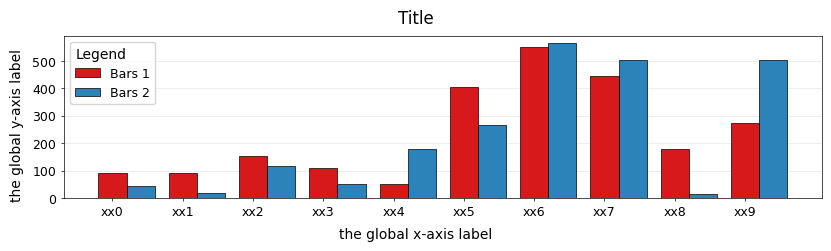

In [18]:
_ = BarChart(
    {
        "charts": charts,
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": FIG_SIZE.A4_NARROW,
        "show_grid": SHOW_GRID.Y,
        # show the legend
        "show_legend": True,
    }
)

### Subplots

To draw multiple charts in each subplot, simply add the `subplots` attribute. The chart's `subtitle` are then added at the top of each subplot, while the `title`, `xlabel` and `ylabel` are positioned to be global for all charts.

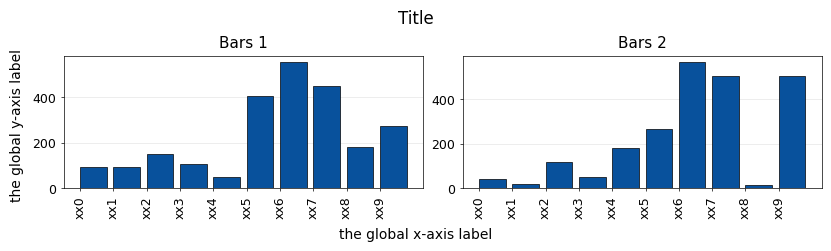

In [19]:
_ = BarChart(
    {
        "charts": charts,
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": FIG_SIZE.A4_NARROW,
        "show_grid": SHOW_GRID.Y,
        # show each chart in its own subplot
        "subplots": True,
    }
)

### Sharing the x-axis and/or y-axis across subplots

To share the x-axis and/or y-axis across subplots, simply add the `sharex` and/or `sharey` attributes, which are boolean values that specify whether to share the axis across all subplots.

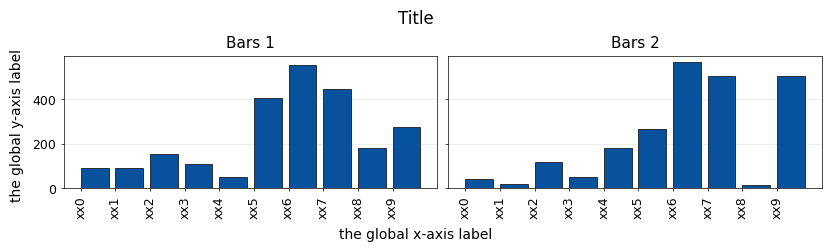

In [20]:
_ = BarChart(
    {
        "charts": charts,
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": FIG_SIZE.A4_NARROW,
        "show_grid": SHOW_GRID.Y,
        "subplots": True,
        # share the x-axis across subplots
        "sharex": True,
        # share the y-axis across subplots
        "sharey": True,
    }
)

### Subplot orientation

The `orientation` attribute can be used to change the orientation of all subplots.

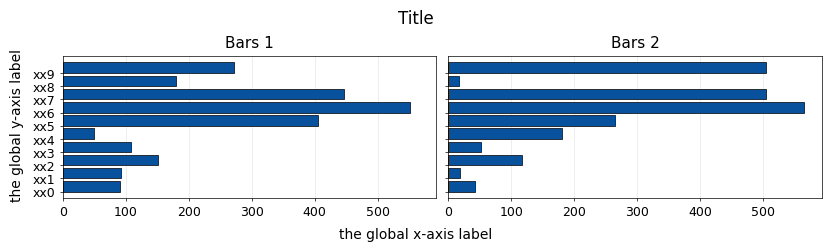

In [21]:
_ = BarChart(
    {
        "charts": charts,
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": FIG_SIZE.A4_NARROW,
        "subplots": True,
        "sharex": True,
        "sharey": True,
        # change the grid to match the change in orientation
        "show_grid": SHOW_GRID.X,
        # change the orientation of the bars
        "orientation": ORIENTATION.HORIZONTAL,
    }
)

## Additional Features

### Error bars

To add error bars to each bar chart, first define the `yerr` in the `data` attribute. Afterwards, add the `show_yerr` attribute.

In [22]:
charts = [
    {
        **chart,
        # add the yerr value to plot the error bars
        "data": [{**d, "yerr": 50 * random.random()} for d in chart["data"]],
        "style": {
            # add the plot error bar color
            "plot_bar_error_color": "#000000",
        },
    }
    for chart in charts
]

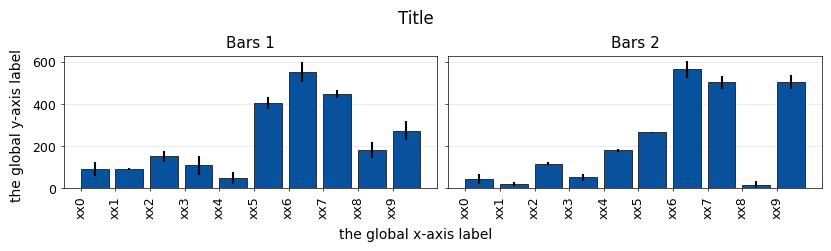

In [23]:
_ = BarChart(
    {
        "charts": charts,
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": FIG_SIZE.A4_NARROW,
        "show_grid": SHOW_GRID.Y,
        "subplots": True,
        "sharex": True,
        "sharey": True,
        # show the error bars
        "show_yerr": True,
        # make sure the y-axis starts at 0
        "ymin": 0,
    }
)

### Axis scales

The user can change the axis scale using the `scaley` attributes. The supported scale options are:

| Options      | Description |
| :----------- | :---------- |
| `"linear"`   | The linear scale.              |
| `"log"`      | The log scale.                 |
| `"symlog"`   | The symmetric log scale.       |
| `"asinh"`    | The asinh scale.               |


Again, to help with the options settings, the [datachart.constants](/references/constants/) module contains the following constants:

| Constant        | Description |
| :-------------- | :---------- |
| [datachart.constants.SCALE](/references/constants/#datachart.constants.SCALE) | The axis options. |

In [24]:
from datachart.constants import SCALE

In [25]:
charts = [
    {**chart, "data": [{"label": d["label"], "y": d["y"]} for d in chart["data"]]}
    for chart in charts
]

To showcase the supported scales, we iterate through all of the scales options.

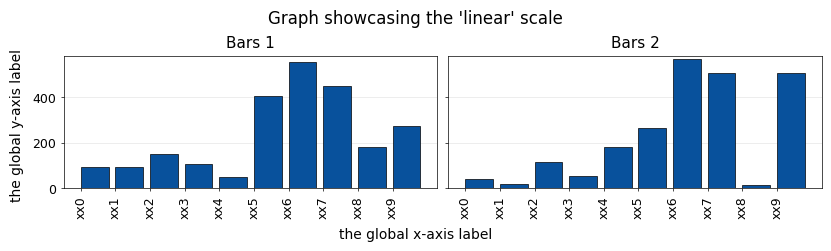

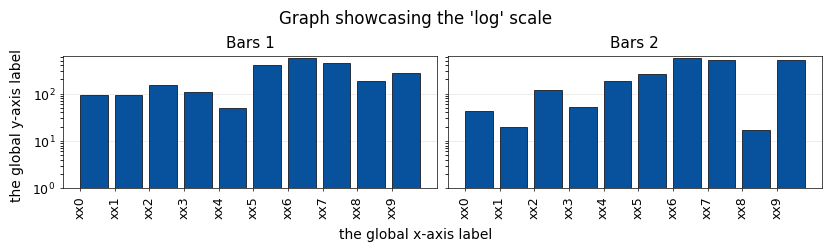

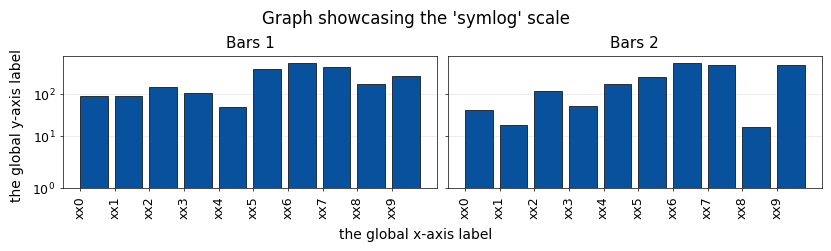

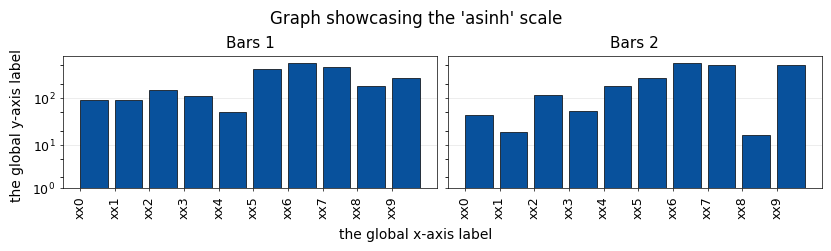

In [26]:
for scale in [SCALE.LINEAR, SCALE.LOG, SCALE.SYMLOG, SCALE.ASINH]:
    figure = BarChart(
        {
            "charts": charts,
            "title": f"Graph showcasing the '{scale}' scale",
            "xlabel": "the global x-axis label",
            "ylabel": "the global y-axis label",
            "figsize": FIG_SIZE.A4_NARROW,
            "show_grid": SHOW_GRID.Y,
            "subplots": True,
            "sharex": True,
            "sharey": True,
            "show_yerr": True,
            "ymin": 1 if scale in [SCALE.LOG, SCALE.SYMLOG, SCALE.ASINH] else 0,
            # set the scale of the x and y axes
            "scaley": scale,
        }
    )

## Saving the Chart as an Image

To save the chart as an image, use the [datachart.utils.save_figure](/references/utils#datachart.utils.save_figure) function.

In [27]:
from datachart.utils import save_figure

In [28]:
save_figure(figure, "./fig_bar_chart.png", dpi=300)

The figure should be saved in the current working directory.